# Assignment 

Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

In [2]:
#read in data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

pd.options.display.max_columns=1000

heart_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [34]:
#preprocessing data 

# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace = '?', value = 0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1) #don't understand this line

In [5]:
#apply scaling to features 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
#define k-means 
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

#fit model 
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

20.3 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
kmeans_cluster.labels_

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

Apply PCA and visulize prediction and the true labels of observations. 

In [ ]:
sns.scatterplot

In [85]:
#apply PCA and plot with the first two components 

pca = PCA(n_components=2).fit_transform(X_std)

In [86]:
out = pd.DataFrame(pca, columns=['PC1', 'PC2'])
out['True'] = y
out['Pred'] = y_pred

out.head()

,PC1,PC2,True,Pred
0,1.161272,0.938595,1,1
1,3.237768,1.423937,0,1
2,3.140044,-0.649114,0,1
3,-0.453101,-1.430133,1,0
4,-2.257944,0.386174,1,0


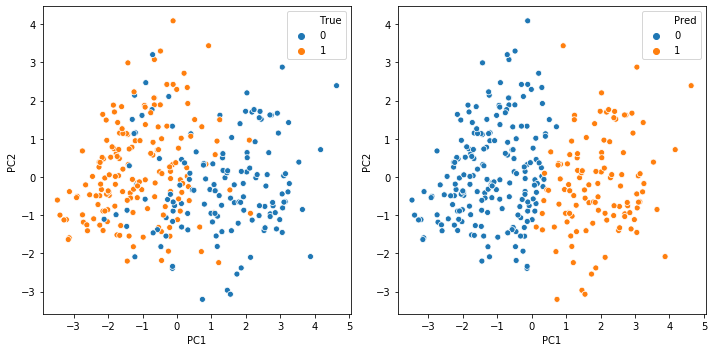

In [98]:
#plot results and compare pred vs. true

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

sns.scatterplot(x='PC1', y='PC2', hue='True', data=out)

plt.subplot(1,2,2)

sns.scatterplot(x='PC1', y='PC2', hue='Pred', data=out)

plt.tight_layout()
plt.show()

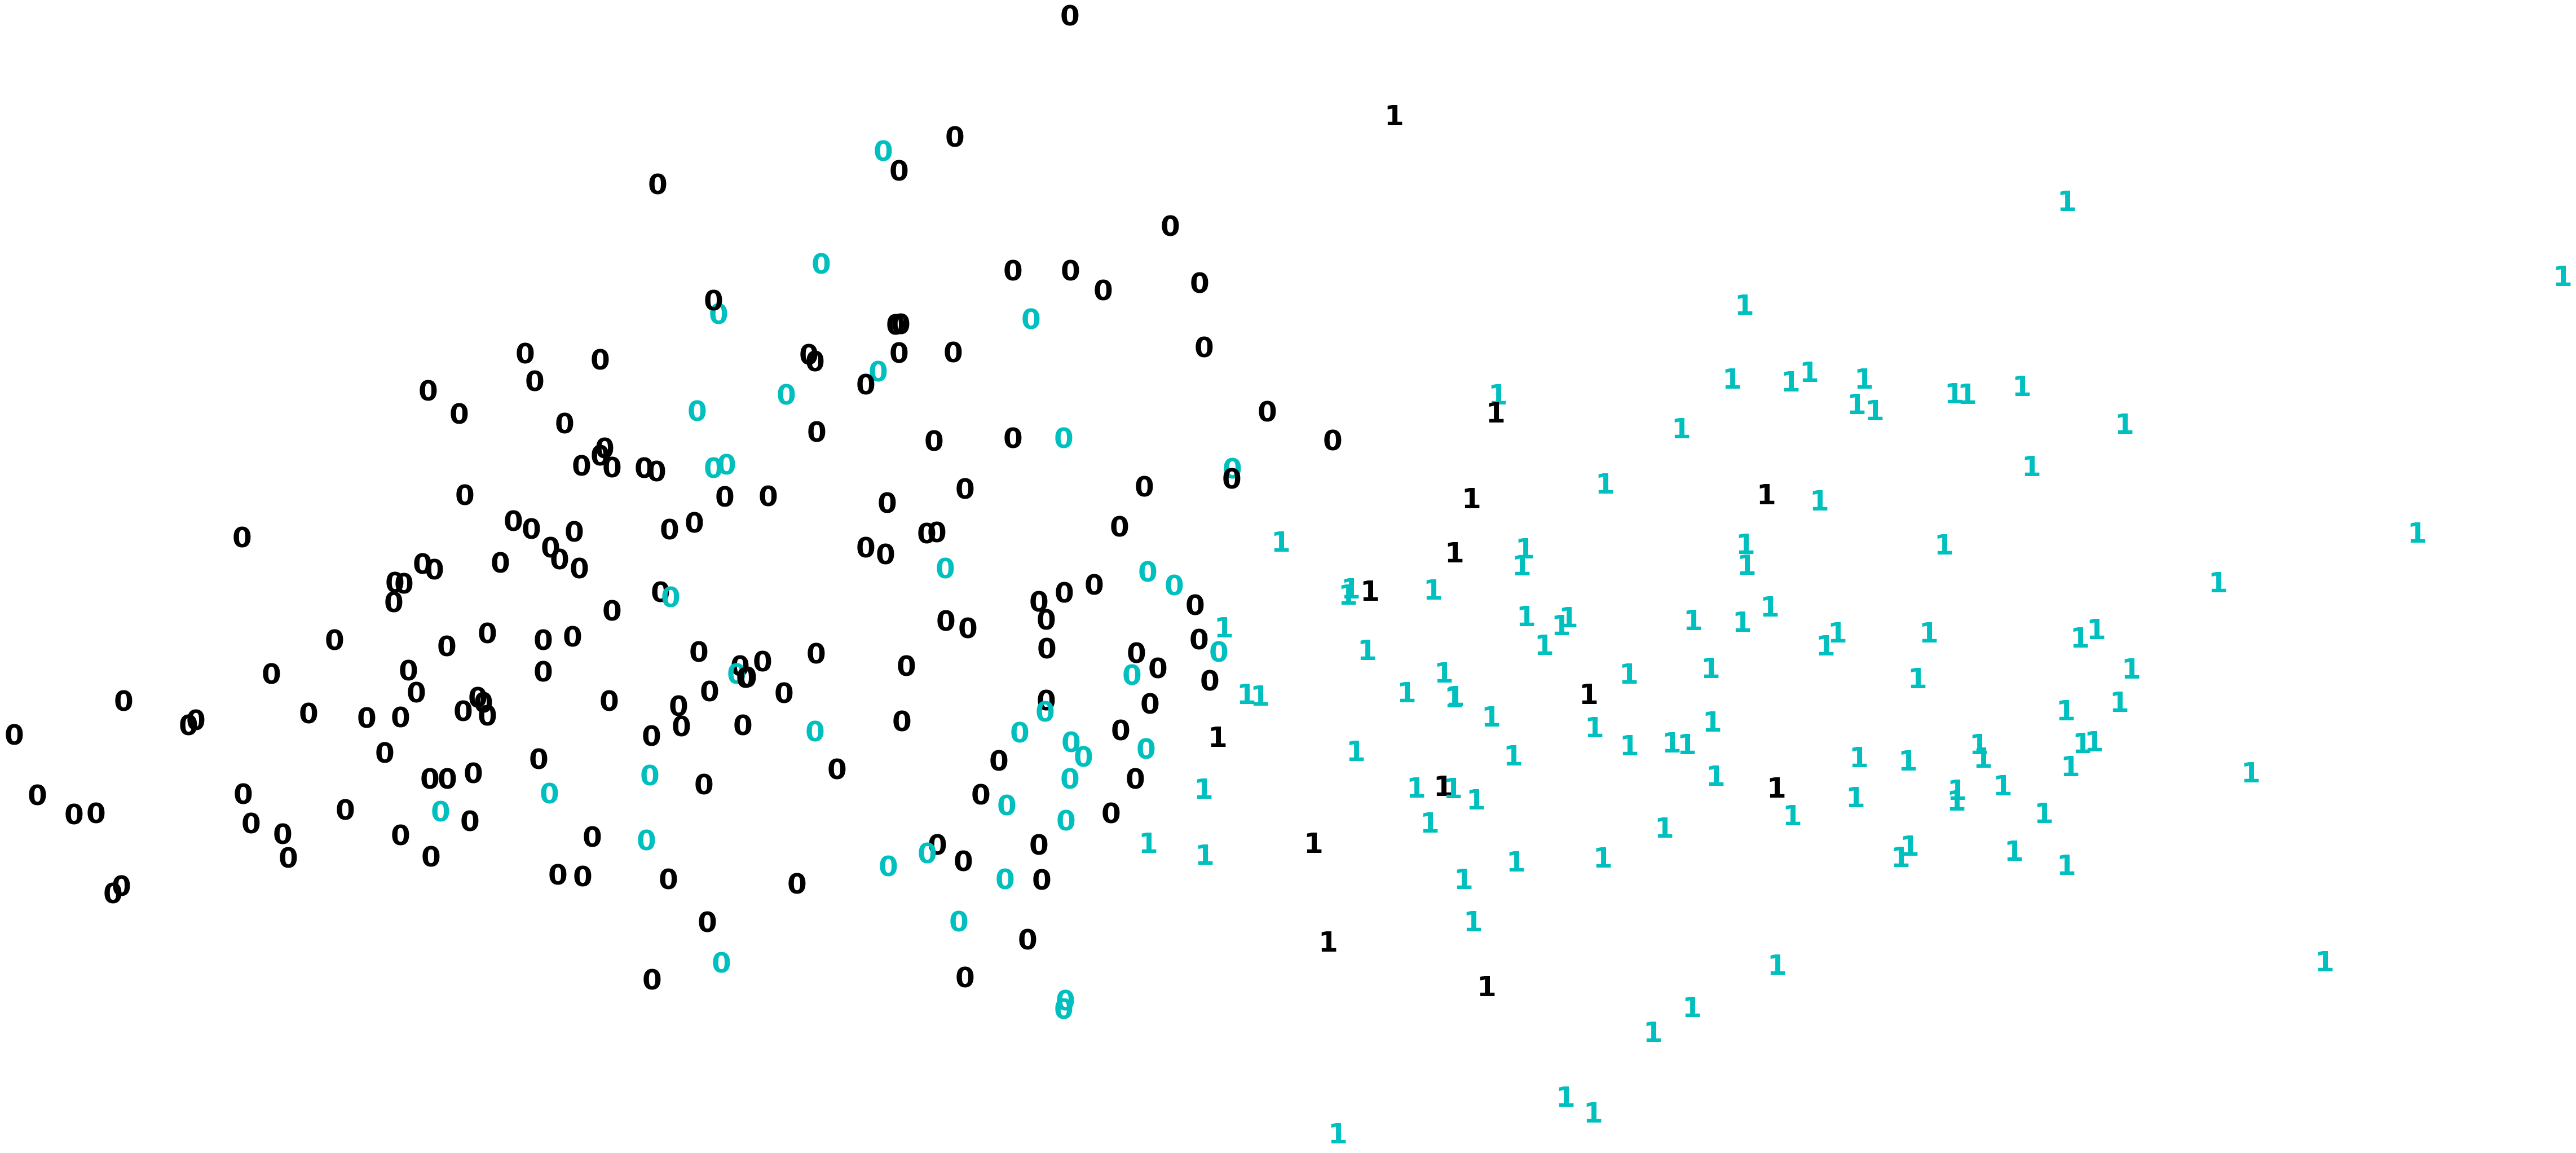

In [102]:
plt.figure(figsize=(10,5))

colours = 'C0'

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show()

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.27      0.23       139
           1       0.11      0.08      0.09       164

    accuracy                           0.17       303
   macro avg       0.16      0.18      0.16       303
weighted avg       0.15      0.17      0.16       303



In general, this k-means clustering didn't do a good job recovering the actual clusters with classification accuracy of 0.17, true positive rate of 0.08 and true negative rate of 0.27. 